# **Modelling and Evaluation**

## Objectives

* Answer Business requirement 2:
    * The client wants to be able to know from the MRI brain scan if a patient has a tumor or not.

## Inputs

* input/train
* input/test
* input/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file. 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/tom/codeinstitute/brain-tumor-detect/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
working_dir = os.getcwd()
working_dir

'/home/tom/codeinstitute/brain-tumor-detect'

# Import regular packages

Section 1 content

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

# Set input directories

Set train, validation and test paths

In [9]:
input_dir = 'input'
train_path = os.path.join(input_dir, 'train')
test_path = os.path.join(input_dir, 'test')
validation_path = os.path.join(input_dir, 'validation')


# Set ouput directory

In [10]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(os.path.join(working_dir, 'outputs')):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

# Set lables

In [11]:
labels = os.listdir(train_path)
print(f'Project lables: {labels}')

Project lables: ['mri-tumor', 'mri-non-tumor']


# Load image shape

## Import saved image shape embedding

In [12]:
import joblib
image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(240, 240, 3)

# Number of images in train, test and validation data sets and their respective data balance

* train - mri-tumor: 1178 images
* train - mri-non-tumor: 1455 images
* validation - mri-tumor: 169 images
* validation - mri-non-tumor: 209 images
* test - mri-tumor: 336 images
* test - mri-non-tumor: 415 images




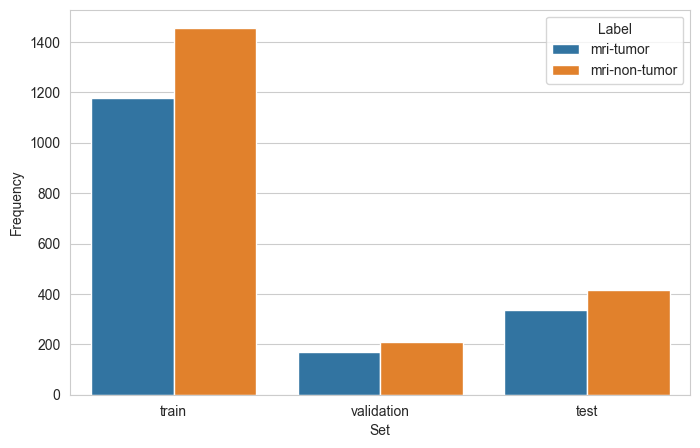

In [15]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(os.path.join(input_dir, folder, label))))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(os.path.join(input_dir, folder, label)))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

From the diagram we can observe that the datasets are imbalanced. We will procede with data augmentation, and, if necessary, with over sampling the mri-tumor datasets.

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Image Data Augmentation

---

## Import ImageDataGenerator from tensorflow library

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We will then setup the pipeline for the image data generator

In [21]:
from keras.preprocessing.image import ImageDataGenerator
augmentation_data = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    shear_range = 15,
    fill_mode='nearest',
    rescale=1.0/255.0,
)


## Augmentation of the training image dataset

In [24]:
batch_size = 40 
train_set = augmentation_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2633 images belonging to 2 classes.


{'mri-non-tumor': 0, 'mri-tumor': 1}

## Augmentation of the validation image dataset

In [25]:
validation_set = augmentation_data.flow_from_directory(validation_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

validation_set.class_indices

Found 378 images belonging to 2 classes.


{'mri-non-tumor': 0, 'mri-tumor': 1}

## Augmentation of the test image dataset

In [26]:
test_set = augmentation_data.flow_from_directory(test_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

test_set.class_indices

Found 751 images belonging to 2 classes.


{'mri-non-tumor': 0, 'mri-tumor': 1}

---

## Plot augmented training images

(40, 240, 240, 3)


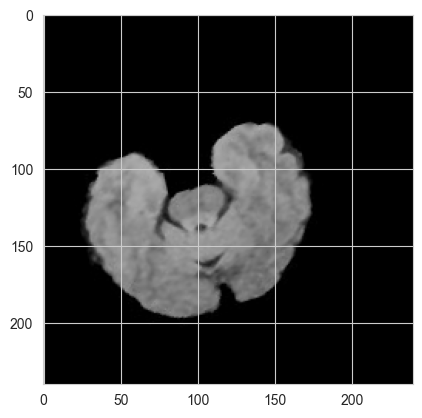

(40, 240, 240, 3)


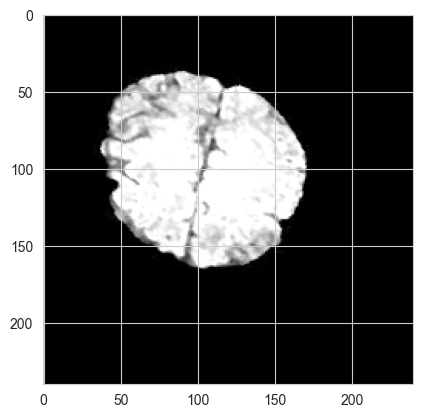

(40, 240, 240, 3)


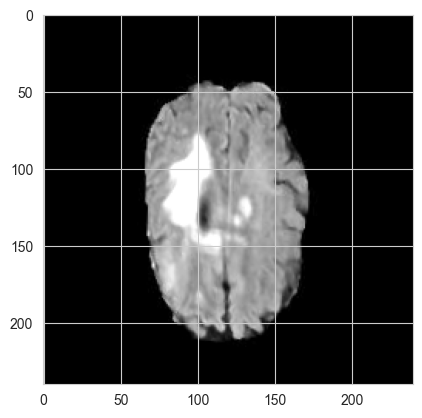

(40, 240, 240, 3)


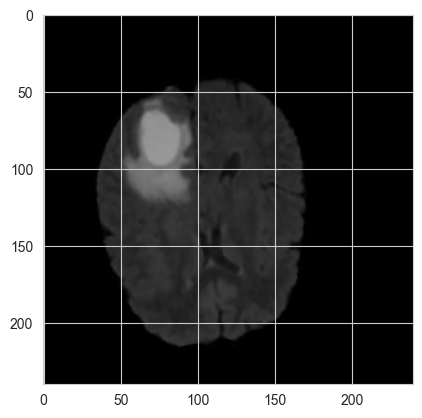

(40, 240, 240, 3)


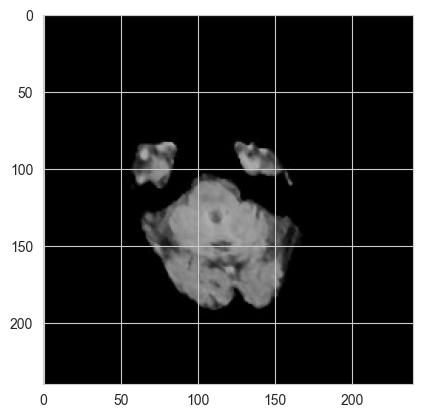

In [28]:
for i in range(5):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot validation images

(40, 240, 240, 3)


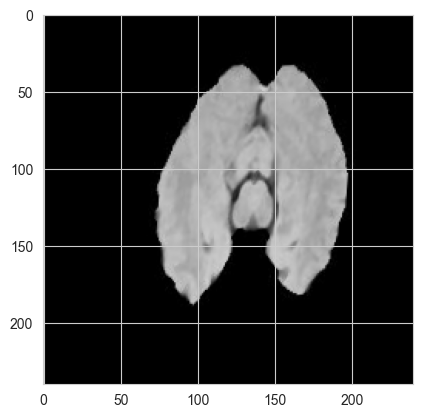

(40, 240, 240, 3)


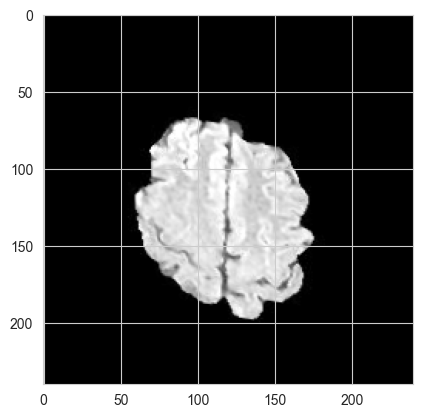

(40, 240, 240, 3)


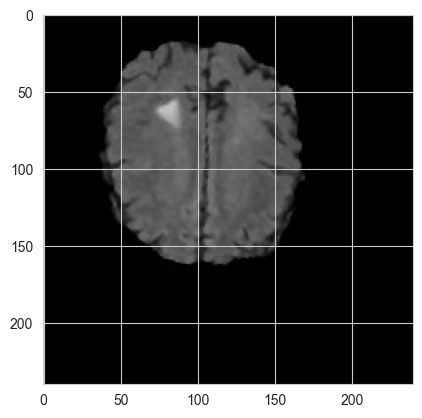

(40, 240, 240, 3)


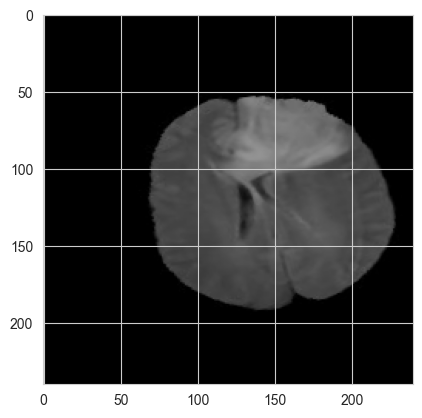

(40, 240, 240, 3)


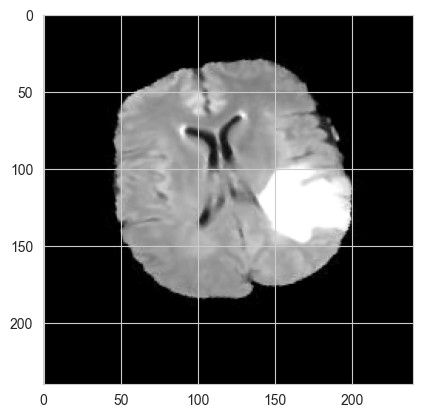

In [29]:
for i in range(5):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(40, 240, 240, 3)


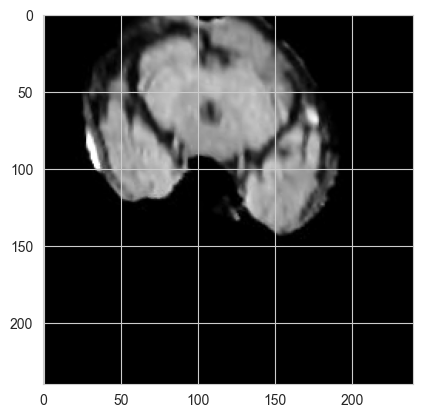

(40, 240, 240, 3)


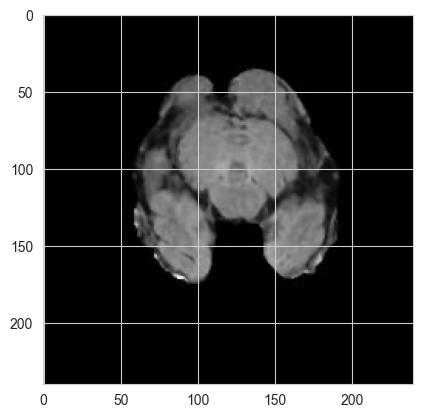

(40, 240, 240, 3)


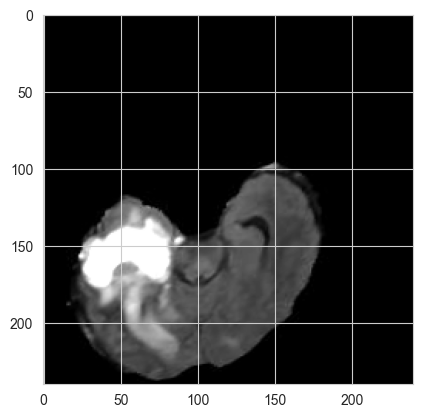

(40, 240, 240, 3)


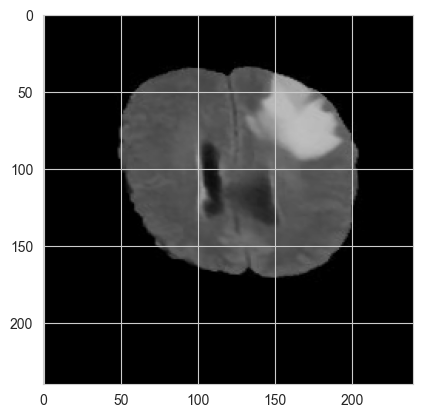

(40, 240, 240, 3)


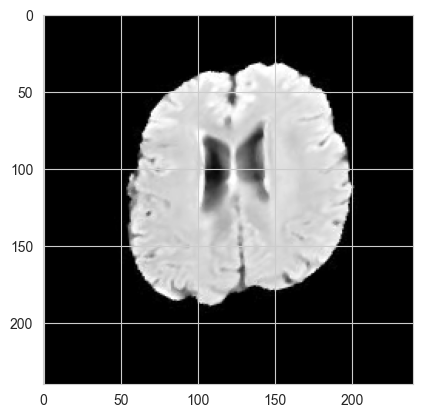

In [30]:
for i in range(5):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
